In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#teaching computers to see

#might be helpful if a computer can see things in the real world.

#images can be show numerically or literally, if the image is numerically encoded can just use regular classification models

In [3]:
#binary classification (pizza or steak), multiclass classification (sushi, steaak, or pizza)

#also can solve object detection problems, detect the objects and then classify them, tesla self driving cars

In [4]:
#computer vision imputs and outputs

#inputs (numerical endcoded versions of our images) ---> outputs (liklihood of each classes for the photos)
#this is often a convolutional neural network (CNN)

# (batch_size, width, height, color_channels) ex. (32, 224, 224, 3), output shape ([2]) (number of classes)

#computer vision is a practice of writing algorithms which can discover patterns in visual data, such as the patterns in neural networks which can recognize a car driving infront

The images were working with are from the food 101 dataset (101 different classes of food)

however we modified it to use only two classes using the image data modification notebook

In [5]:
import zipfile

#wget means get this file and download it into google colab
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-03-14 12:48:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.9MB/s    in 6.1s    

2025-03-14 12:48:51 (17.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



**we start with a smaller dataset so we can experiment quickly and experiment what works and what doesnt work

In [6]:
#becoming one with the data, inspect the data
#A very crucial step at the beginning of any machine learning project is becoming one with the data
#for a computer vision project this usually means visualizing many samples of the data

!ls pizza_steak #list the files in pizza steak, here are the options inside pizza steak

test  train


In [7]:
!ls pizza_steak/train/ #heres whats inside the train folder of pizza_steak, we can either choose pizza or steak

pizza  steak


In [8]:
!ls pizza_steak/train/steak #heres a ton of images of steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [9]:
#theres a function in os called walk
import os

#walk through pizza_steak directory and list number of files

for dirpath, dirnames, filesnames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filesnames)} images in {dirpath}")


There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [10]:
#another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train #heres a way to inspect just one directory

750

In [11]:
#to visualize images, first lets get the class names programatically ,

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #create a list of class names for each directory in the training directory

print(class_names)

['pizza' 'steak']


In [12]:
#lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #set up the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


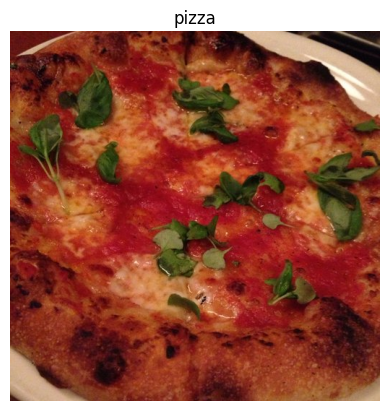

In [13]:
#view a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/", target_class = "pizza")

In [14]:
import tensorflow as tf
tf.constant(img) #how to preprocess images into tensors

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 94,  17,  11],
        [ 96,  19,  13],
        [ 96,  21,  15],
        ...,
        [ 33,  13,  12],
        [ 35,  15,  14],
        [ 35,  15,  14]],

       [[ 94,  17,  11],
        [ 94,  17,  11],
        [ 92,  17,  11],
        ...,
        [ 37,  17,  16],
        [ 37,  17,  16],
        [ 35,  15,  14]],

       [[ 94,  16,  12],
        [ 92,  14,  10],
        [ 90,  15,   9],
        ...,
        [ 40,  22,  22],
        [ 38,  20,  20],
        [ 35,  17,  17]],

       ...,

       [[ 71,  32,  27],
        [ 71,  32,  25],
        [ 65,  26,  21],
        ...,
        [202, 168, 130],
        [201, 166, 128],
        [201, 166, 128]],

       [[ 66,  26,  24],
        [ 69,  30,  25],
        [ 64,  24,  22],
        ...,
        [203, 168, 130],
        [202, 167, 129],
        [202, 167, 129]],

       [[ 66,  26,  24],
        [ 70,  30,  28],
        [ 65,  25,  23],
        ...,
        [203, 168, 13

In [15]:
#images are actually a giant array of different pixel values
img.shape #returns width, height, color channels

(512, 512, 3)

In [16]:
#need to normalize the pixel values, lets get all the values in our pixels between 0 and 1
img.max()

255

In [17]:
img/255. #here is the preprocessed pixels of one image, but we need to do this in bulk to get all of the images preprocessed

array([[[0.36862745, 0.06666667, 0.04313725],
        [0.37647059, 0.0745098 , 0.05098039],
        [0.37647059, 0.08235294, 0.05882353],
        ...,
        [0.12941176, 0.05098039, 0.04705882],
        [0.1372549 , 0.05882353, 0.05490196],
        [0.1372549 , 0.05882353, 0.05490196]],

       [[0.36862745, 0.06666667, 0.04313725],
        [0.36862745, 0.06666667, 0.04313725],
        [0.36078431, 0.06666667, 0.04313725],
        ...,
        [0.14509804, 0.06666667, 0.0627451 ],
        [0.14509804, 0.06666667, 0.0627451 ],
        [0.1372549 , 0.05882353, 0.05490196]],

       [[0.36862745, 0.0627451 , 0.04705882],
        [0.36078431, 0.05490196, 0.03921569],
        [0.35294118, 0.05882353, 0.03529412],
        ...,
        [0.15686275, 0.08627451, 0.08627451],
        [0.14901961, 0.07843137, 0.07843137],
        [0.1372549 , 0.06666667, 0.06666667]],

       ...,

       [[0.27843137, 0.1254902 , 0.10588235],
        [0.27843137, 0.1254902 , 0.09803922],
        [0.25490196, 0

In [18]:
#building our first end to end cnn, 255 is the maximum pixel value

#lets build a cnn to find patterns in our images, we need a way to load our images preprocess our images, build a cnn to find patterns in our images, compile our cnn, fit the cnn to our training data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#preprocess data, get all of the pixel values between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#set up paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directory and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

#build a cnn model same as the tiny VGG on the CNN explainer website
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#now we need to compile our cnn
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data)) #labels and data are created for us in datagen

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.5692 - loss: 0.6710 - val_accuracy: 0.7360 - val_loss: 0.5885
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.7366 - loss: 0.5500 - val_accuracy: 0.7360 - val_loss: 0.5122
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.7840 - loss: 0.4529 - val_accuracy: 0.8480 - val_loss: 0.3654
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8313 - loss: 0.3918 - val_accuracy: 0.8700 - val_loss: 0.3383
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.8516 - loss: 0.3361 - val_accuracy: 0.8740 - val_loss: 0.3035


**note** if the above cell is taking longer than 10 secs per epoch make sure to connect to a gpu, you may have to rerun some cells above

In [19]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [20]:
tf.random.set_seed(42)

#create a model to replicate tensorflow playground model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

#fit the model
history_2 = model_2.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
                        validation_data = valid_data, validation_steps = len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.4806 - loss: 0.6948 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.4711 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.4786 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.4806 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.4871 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [21]:
model_2.summary() #20 times more trainable parameters than the cnn and had terrible performance

#this is a hint to the power of cnns

#trainable parameters are learnable parameters the model can learn on

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [22]:
#this model isnt working with the image data, how might we upgrade this model? need to change the architecture

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, tf.keras.activations.relu),
    tf.keras.layers.Dense(100,tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

#fit the model
history_3 = model_3.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.5236 - loss: 4.4175 - val_accuracy: 0.6140 - val_loss: 1.4380
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.7203 - loss: 0.7387 - val_accuracy: 0.6860 - val_loss: 0.7451
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.6996 - loss: 0.7327 - val_accuracy: 0.6680 - val_loss: 0.6952
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.7393 - loss: 0.5734 - val_accuracy: 0.7580 - val_loss: 0.5353
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.7656 - loss: 0.5089 - val_accuracy: 0.7000 - val_loss: 0.7747


In [23]:
#just by imporving the amount of neurons was able to increase the accuracy to 80%,

#this one may have overfitted

model_3.summary() #it has 15 million trainable parameters almost 500 times the parameters of cnn

#and still doesnt perform as good as it

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [24]:
#the kind of problem working with is important when selecting a model, for computer vision problems we should build cnns

In [25]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [26]:
#binary classification

#become one with the data
#preprocess the data normalizing data
#created the model, a baseline model
#fit the model
#evaluate the model
#adjust the different paraameters and improve the model

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


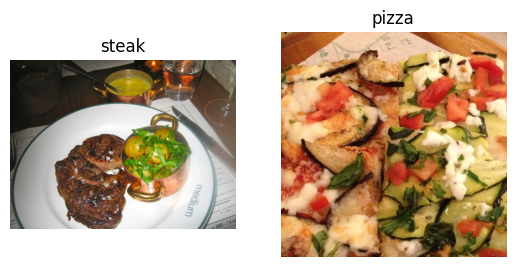

In [27]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [28]:
!nvidia-smi

Fri Mar 14 12:50:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P0             29W /   70W |    1690MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [29]:
#now its time to prepare our data to be used with the model

#turn all data into numbers nns cant handel images directly
#correct shapes

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

#our next step is to turn our data into batches

#a batch is a small subset of the dataset that our model looks at during training,
#rather than look at all 1500 images at one time the model will only look at 32 at a time

# it does this for a couple of reasons, 10,000+ images might not might into the memory of our processors

#trying to learn all these patternes at one time might cause the model not being able to learn very well

#why 32? because 32 is good for your health (twitter reference), friends dont let friends use mini batches larger than 32


#create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#the data needs to be normalized, this is how its done for image data
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)





In [30]:
train_data = train_datagen.flow_from_directory(directory = train_dir, #target directory of images
                                               target_size = (224, 224), #target size of images
                                               class_mode = "binary", #type of data your working with
                                               batch_size = 32) #size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224, 224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [31]:
#we the proper amount of images in each set
images, labels = next(train_data)
#could create a valid data group and split some of the test data into there
len(images), len(labels)

#theres 32 images and 32 labels per batch

(32, 32)

In [32]:
len(train_data) #the len is 47 because there is 47 batches of 32

47

In [33]:
1500/47

31.914893617021278

In [34]:
#get the first two images
images[:2] #heres a display of the first two images numerically encoded

array([[[[0.56078434, 0.63529414, 0.79215693],
         [0.5647059 , 0.6392157 , 0.7960785 ],
         [0.5647059 , 0.6392157 , 0.80392164],
         ...,
         [0.07843138, 0.08235294, 0.05882353],
         [0.08235294, 0.08235294, 0.07450981],
         [0.09803922, 0.09803922, 0.09803922]],

        [[0.5647059 , 0.6392157 , 0.7960785 ],
         [0.5568628 , 0.6313726 , 0.7960785 ],
         [0.5568628 , 0.6313726 , 0.7960785 ],
         ...,
         [0.09803922, 0.10196079, 0.07058824],
         [0.0627451 , 0.06666667, 0.04705883],
         [0.04313726, 0.04313726, 0.03529412]],

        [[0.5686275 , 0.6431373 , 0.8078432 ],
         [0.5647059 , 0.6392157 , 0.80392164],
         [0.5647059 , 0.6392157 , 0.8078432 ],
         ...,
         [0.07450981, 0.07843138, 0.04705883],
         [0.15686275, 0.16078432, 0.13725491],
         [0.21568629, 0.21960786, 0.20000002]],

        ...,

        [[0.3921569 , 0.34901962, 0.22352943],
         [0.39607847, 0.3529412 , 0.23529413]

In [35]:
#get the first two images of the first batch, get the shape of the first image
images[0].shape #this is the desired shape we set it to be

(224, 224, 3)

In [36]:
#upscaling to 512 might make the images include more data but they will also take linger to run

labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

**note** - almost an infinite amount of architectures you can create, one of the best ways to get started is start with something simple and add complexity as you go, find what models are working the best that already exist for similar problems

ex. papers with code.com
or google neural networks for image classification

In [37]:
#turning our data into batches

#time to create a cnn baseline model, a relatively simple model or existing result we set up when beginning a machine learning experiment and as we keep going we will try to beat the baseline

#lets make a simple cnn
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import Sequential

model_4 = Sequential([
    Conv2D(filters = 10, #how many filters should pass over am image, sliding windows (typical values 10, 32, 64, 128), more filters is a more complex model
           kernel_size = (3, 3), #also called filter size, determines the shape of the filter the sliding window, lower values learn smaller features larger kernels might find larger features like edges
           strides = 1, #if stride is one the stride is one pixel at a time, icreasing the stride also significantly reduces teh output shape
           padding = "valid",#lowers the output shape, compesses the amount of data, can also be set to same, if same output shpae is same as input shape, if valid output shape gets compressed
           activation = tf.keras.activations.relu,
           input_shape = (224, 224, 3)), #input layer specify input shape
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid") #working with binary classification so only one output neuron
])

model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy,
    optimizer = Adam(),
    metrics = ["accuracy"])


In [38]:
model_4.summary() #theres alot more trainable parameters here because theres no max pooling layers

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

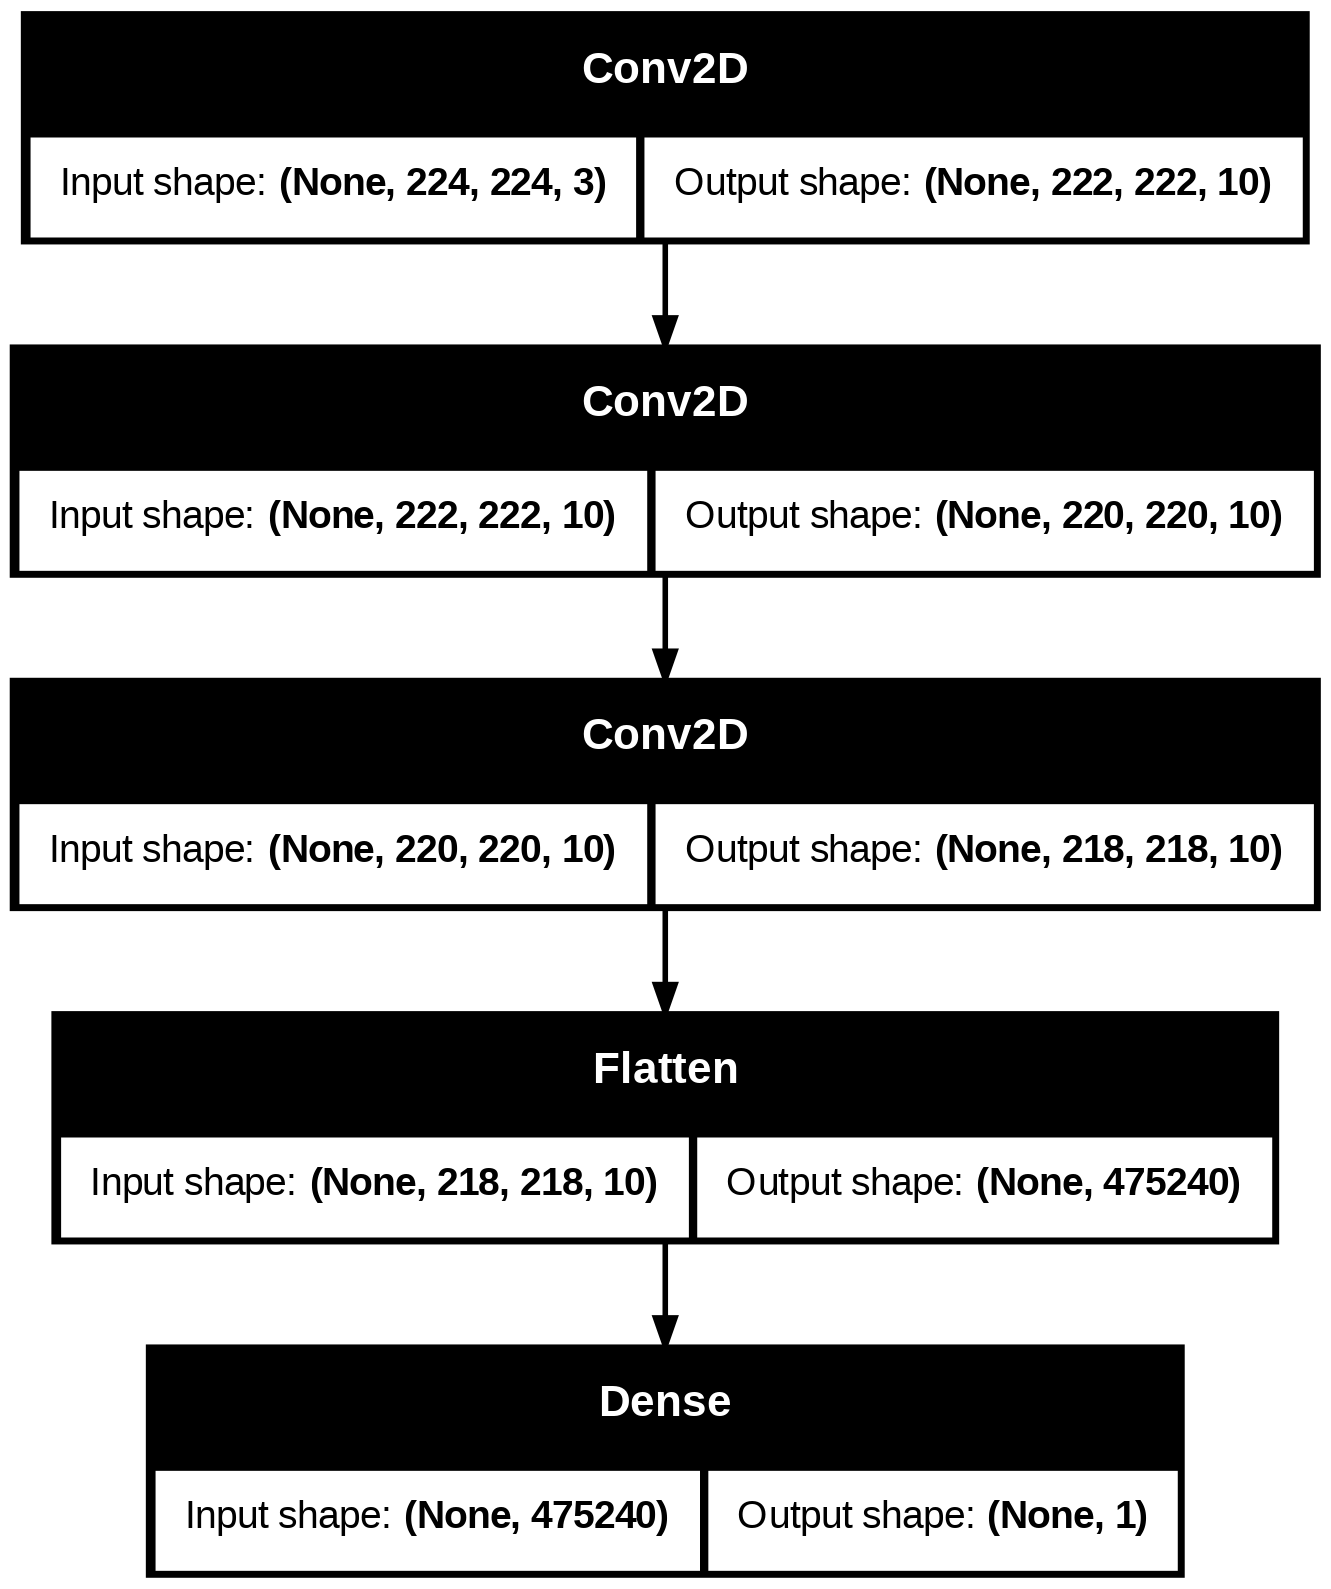

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes = True) #output shape is compressesd in every layer, showing that if its applied in the first layer it carries through


In [40]:
#cracking open our model
weights, biases = model_4.layers[1].get_weights()

In [41]:
len(train_data), len(test_data)

(47, 16)

In [42]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data), #makes each epoch have the same as each batch size before delaring one epoch finished and starting the next
                        validation_data = test_data,
                        validation_steps = len(test_data) #same idea as steps per epoch
                        )

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 185ms/step - accuracy: 0.6590 - loss: 0.7095 - val_accuracy: 0.8000 - val_loss: 0.4341
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.8141 - loss: 0.4209 - val_accuracy: 0.8340 - val_loss: 0.3963
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.8738 - loss: 0.3082 - val_accuracy: 0.8420 - val_loss: 0.3864
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.9128 - loss: 0.2210 - val_accuracy: 0.8280 - val_loss: 0.3922
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.9835 - loss: 0.0763 - val_accuracy: 0.8100 - val_loss: 0.4642


In [43]:
#its probebly overfitting because theres so many trainable parameters and no max pooling to get whats most important

#the model is doing well on the training data but underperforming on the test set

#lets compare it to model 1
model_1_loss, model_1_accuracy = model_1.evaluate(test_data)
model_4_loss, model_4_accuracy = model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8794 - loss: 0.3157
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8092 - loss: 0.4703


In [44]:
model_1_accuracy, model_4_accuracy #pretty similar actually

(0.8740000128746033, 0.8100000023841858)

<Axes: >

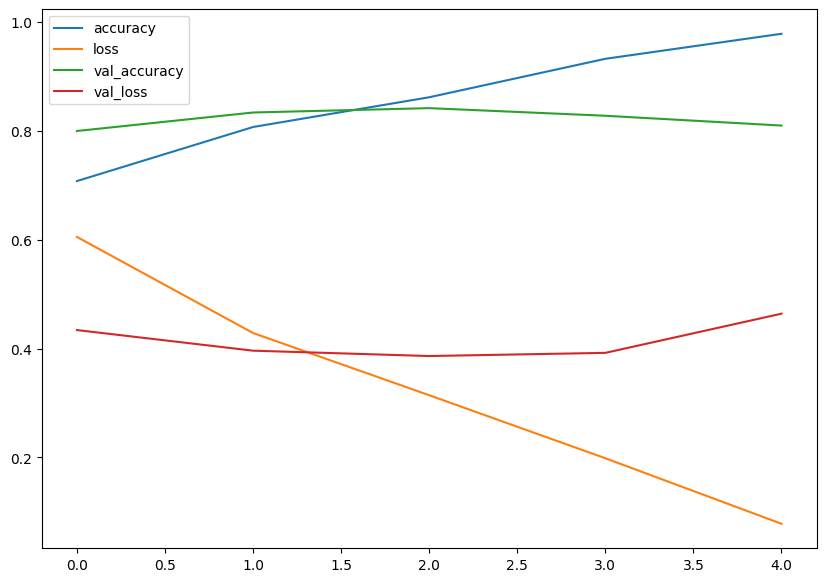

In [45]:
#what are some other ways we can evaluate our baseline model?

import pandas as pd #because we want to create plots form history dataframes

pd.DataFrame(history_4.history).plot(figsize = (10, 7)) #the validation loss is not really improving

In [46]:
#lets plot the validation curves and training curves seperately
def plot_loss_curves(history):
  """
  returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot the loss
  plt.figure()
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend();

  #plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

**when our models validation loss starts to increase, its likely that the model is overfitting this means its learning the patterns in the training dataset too well. thats the models ability to generalize to unseen data will be diminished.**

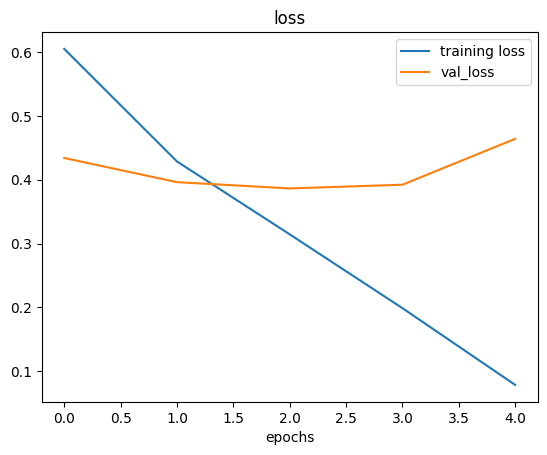

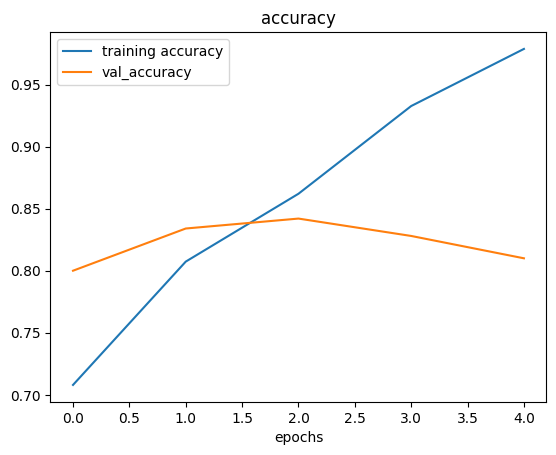

In [47]:
#check out the loss and accuracy of model 4
plot_loss_curves(history_4)

In [48]:
#we need some ways to prevent overfitting

#overfitting is like learning the course materials far too well because all you did is memorize the answers to the practice questions but dont understand the patterns in how to solve new questions

#ideally the two loss and accuracy curves would be very similar

fitting a machine learning model comes in 3 steps.

0. create a baselline
1. beat the baseline by overfitting a larger model
2. reduce overfitting

ways to induce overfitting,
0. increase the number of conv layers make our nn deeper
1. increase the number of filters to 32 or 64
2. add another dense layer to the output of our flattened layer

ways to reduce overfitting
0. add data augmentation
1. add regularization layers such as maxpool2d
2. add more data


In [49]:
#create the model with maxpool this will be our new baseline
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2), #max pooling only keeps the most importanat features from each kernel, it only takes the max value and makes the output smaller
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_5.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics= ["accuracy"]
)

history_5 = model_5.fit(train_data, epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.5833 - loss: 0.6605 - val_accuracy: 0.7680 - val_loss: 0.4544
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.7914 - loss: 0.4527 - val_accuracy: 0.8260 - val_loss: 0.3758
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.8336 - loss: 0.3890 - val_accuracy: 0.7720 - val_loss: 0.4566
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.8142 - loss: 0.4186 - val_accuracy: 0.8860 - val_loss: 0.3220
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.8361 - loss: 0.3761 - val_accuracy: 0.8420 - val_loss: 0.3760


In [50]:
model_5.summary() #at every max pool the data is halved

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

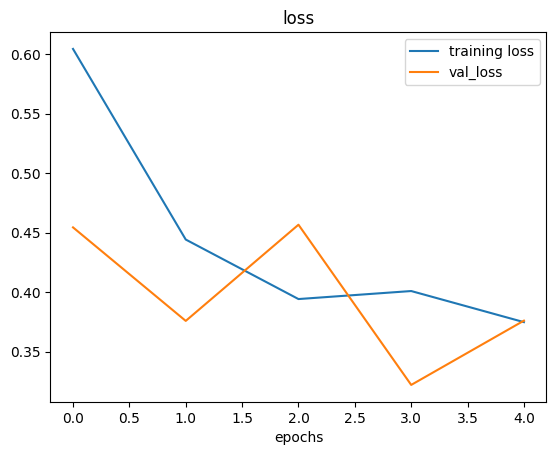

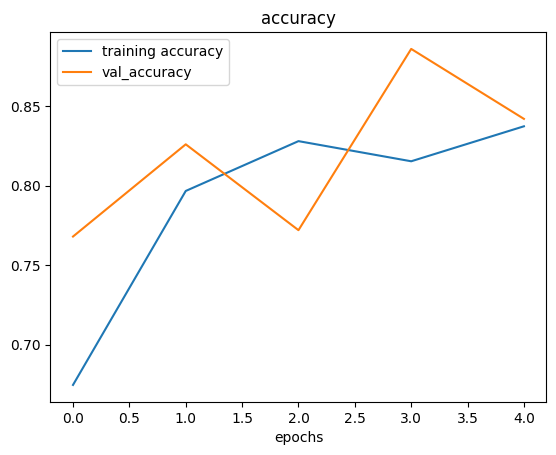

In [51]:
plot_loss_curves(history_5)

In [52]:
#not perfect but they are trending in the same direction, what maxpooling has done is removed the features that are unimportant,
#lower number of parametes but those parameters are of a higher value,

#reducing overfitting is also known as regularization

#next we will use data augmentation to further reduce overfitting to the training data.


opening our bag of tricks and finding data augmentation

In [53]:
#create imagedatagenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2, #how much do you want to shear an image?
                                             zoom_range = 0.2, #zoom in randomly on an image
                                             width_shift_range = 0.2, #move image around on the x-axis
                                             height_shift_range = 0.2, #move image around on the y-axis
                                             horizontal_flip = True) #do you want to flip and image

# create imagedatagenerator without dataaugmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

#create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)

data augmentation is the process of altering our training data to be able to learn more and reduce overfitting, only applied to our training data, increases diveristy of training data without getting additional data

In [54]:
#lets write some code to visualize data augmentation
print("augmented_training_data")
train_data_augmeneted = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size = (224,224),
                                                                    batch_size = 32,
                                                                    class_mode = "binary",
                                                                    shuffle = False) #for demonstration purposes only

#create non augmented training data
print("non augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               batch_size = 32,
                                               shuffle = False)

print("non augmented testdata:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             class_mode = "binary",
                                             batch_size = 32)

augmented_training_data
Found 1500 images belonging to 2 classes.
non augmented training data: 
Found 1500 images belonging to 2 classes.
non augmented testdata:
Found 500 images belonging to 2 classes.


In [55]:
#note data augmentation is usually only performed on the training data
#using ImageDataGenerator built in data augmentation parameters our images are left
#the same in the directories but are modified as loaded into models

In [56]:
#lets finally visualize some augmented data

#get some sample augmented data batches, labels arent augmented only images
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmeneted)

showing image number 21


(-0.5, 223.5, 223.5, -0.5)

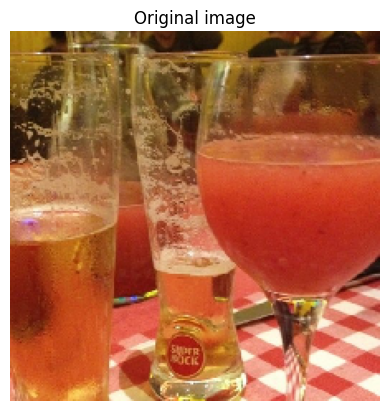

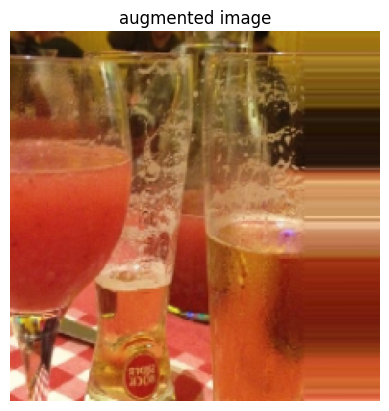

In [57]:
#show the origianl images and the augmented images

import random
random_number = random.randint(0, 32)
print(f"showing image number {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("augmented image")
plt.axis(False)

In [68]:
#looking at the same image but from different perspectives (data augmentation), other parameters are cropping, shearing

#lets train a model with augmented data

model_6 = Sequential([
    Conv2D(filters = 10, kernel_size = (3,3), strides = 1, activation= "relu",
           padding = "valid", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics = ["Accuracy"]
)

history_6 = model_6.fit(train_data_augmeneted, epochs = 5, steps_per_epoch = len(train_data_augmeneted), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 496ms/step - Accuracy: 0.4507 - loss: 0.7713 - val_Accuracy: 0.5460 - val_loss: 0.6873
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 399ms/step - Accuracy: 0.5620 - loss: 0.6881 - val_Accuracy: 0.5000 - val_loss: 0.7684
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 407ms/step - Accuracy: 0.4691 - loss: 0.7284 - val_Accuracy: 0.6000 - val_loss: 0.6718
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 416ms/step - Accuracy: 0.5828 - loss: 0.6757 - val_Accuracy: 0.6920 - val_loss: 0.6292
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 392ms/step - Accuracy: 0.6420 - loss: 0.6476 - val_Accuracy: 0.6800 - val_loss: 0.5997


In [ ]:
#for some reason my model is doing terribly at predicting pizza or steak

In [ ]:
#now we are seeing what augmented training data looks like lets build a model and see how it learns on augmented data
model_7 = Sequential([
    Conv2D(10, 3, activation ="relu"),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
    ])

model_7.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)


history_7 = model_7.fit(train_data_augmeneted, #fitting model 7 on augmented training data
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmeneted),
                        validation_data = test_data,
                        validation_steps = len(test_data))





In [ ]:
#the augmented data takes longer to run because the data is augmented on the fly as its loaded in
#this model also performed worse than the original pictures were able to

plot_loss_curves(history_7)

In [ ]:
#theres really no such thing as a perfect loss curve, lets go back and see what happens when we shuffle is true

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    directory = train_dir,
    target_size = (224,224),
    class_mode = "binary",
    batch_size = 32,
    shuffle = True
)

In [ ]:
images, labels = next(train_data_augmented_shuffled)

In [ ]:
plt.imshow(images[0]) #now thats its shufdled a steak is in the fisrt position (by chance)

In [ ]:
model_8 = Sequential([
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = 2), #pool_size is 2 by default anyway
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_8.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

model_8.fit(train_data_augmented_shuffled, epochs = 5, steps_per_epoch = len(train_data_augmented_shuffled),
            validation_data = test_data, validation_steps = len(test_data))

In [ ]:
#this one works way better.

#i just realized why shuffling matters, when it was unshuffled and we train on 5 batches of 32 the model
#only sees the first 160 training examples all of which are pizza which is why the model cant figure out what steak is

In [ ]:
model_8.evaluate(test_data) #now this is the best model yet, augmenting the data results in about a 1% increase in accuracy on the test data

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8378 - loss: 0.3656


[0.34672337770462036, 0.8479999899864197]

In [ ]:
#when shuffling training data the model= gets exposed to all the different kinds of data during training data and learns everything it needs to know

#repeat until statisfied, how would we proceeed to imporove our model

#since we've already beaten our baseline there a few things we could try to improve our model,
#increase the number of model layers (eg. add more 'conv2D'/Maxpool2D layers)

#increase the number of filters in each convolutional layer (eg. from 10 to 32 or even 64)

#train for longer more epochs

#find an ideal learning rate

#get more data (give the model more chances to learn)



In [69]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [71]:
#recreating model one with 32 filters and on the augmented training data
model_9 = Sequential([
    Conv2D(32, 3, activation = "relu"),
    Conv2D(32, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(32, 3, activation = "relu"),
    Conv2D(32, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

model_9.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

history_9 = model_9.fit(train_data_augmented_shuffled, epochs = 5, steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 682ms/step - accuracy: 0.5383 - loss: 0.6995 - val_accuracy: 0.8240 - val_loss: 0.4296
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 446ms/step - accuracy: 0.7646 - loss: 0.5139 - val_accuracy: 0.8220 - val_loss: 0.4077
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 441ms/step - accuracy: 0.7681 - loss: 0.4862 - val_accuracy: 0.8540 - val_loss: 0.4064
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 431ms/step - accuracy: 0.7577 - loss: 0.4948 - val_accuracy: 0.8360 - val_loss: 0.3979
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 444ms/step - accuracy: 0.7891 - loss: 0.4791 - val_accuracy: 0.8620 - val_loss: 0.3450


In [72]:
model_9.evaluate(test_data) #another slight improvement

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.8529 - loss: 0.3559


[0.34497901797294617, 0.8619999885559082]

testing the model on custom images

(-0.5, 3023.5, 4031.5, -0.5)

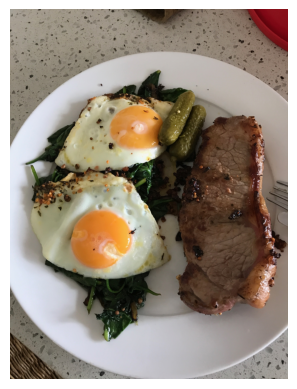

In [94]:

steak = mpimg.imread('/content/03-steak (2).jpeg')
plt.imshow(steak)
plt.axis(False)

In [95]:
steak.shape

(4032, 3024, 3)

In [84]:
expanaded_steak = tf.expand_dims(steak, axis = 0).shape #now we have the correct shape

In [96]:
#need to preprocess our image

#when you train a neural netwoek and you want to make a prediction on it,
#its import the data is preprocessed into the format the model was trained on

def load_and_prep_image(filename, img_shape = 224):
  """
  reads an image from filename. turns it into a tensor and reshapes
  it into (ing_shape, img_shape, img_color)

  """

  #read in the image
  img = tf.io.read_file(filename)

  #decode the read file into a tensor
  img = tf.image.decode_image(img)

  #resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  #rescale the image and get all values between 0 and 1
  img = img/255.

  return img

In [97]:
steak = load_and_prep_image("/content/03-steak (2).jpeg") #img_shape is 224 by defualt so dont need to set it in our custom image

In [99]:
steak #now its in the format that we want

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [102]:
pred = model_9.predict(tf.expand_dims(steak, axis = 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [101]:
#this is a prediction probability, classes are in alphabetical order here making class one pizza and class 2 steak

#it returns a prediction probablility

#looks like our custom image is being put through our model however it would be nice if we could visualize the image as well as the models prediction

class_names

array(['pizza', 'steak'], dtype='<U5')

In [103]:
#we can index the predicted class by roudning the predction probablity and indexing it on the class_names
pred_class = class_names[int(tf.round(pred, 1))]

In [104]:
pred_class

'steak'

In [107]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  plots the image with the predicted class as the title

  """

  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


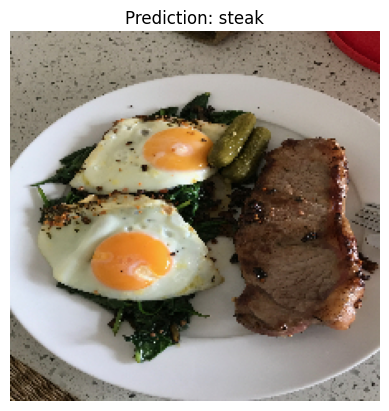

In [108]:
pred_and_plot(model_9, "/content/03-steak (2).jpeg")

In [113]:
#our model works! lets try it on another image

from PIL import Image
import cv2

image_path = r"C:\Users\jason\Downloads\03-pizza-dad.jpeg"

img = cv2.imread(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


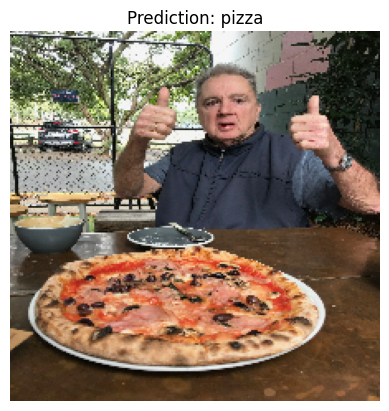

In [118]:
pred_and_plot(model_9, "/content/03-pizza-dad.jpeg")

In [ ]:
#it works!